In [1]:
import numpy as np
#import mlflow
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from PIL import Image
from dataset import *
from save_load import *
from RecUnet_MLP import *
from train_RecUnet_MLP import *
%load_ext autoreload
%autoreload 2

#mlflow.autolog()

c:\Users\gaynuliy\Anaconda3\envs\home\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda


In [2]:
data = dataset_seq()
loaders = get_loaders(data, 2)

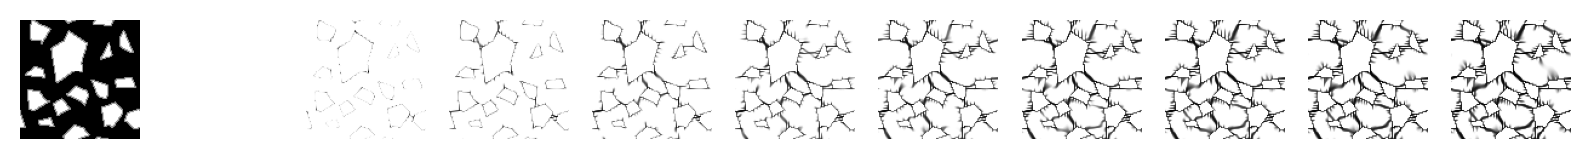

In [3]:
geometry, damage, imp_shrinkage, obs_shrinkage, stiffness = data.__getitem__(1000)
fig, axs = plt.subplots(nrows=1, ncols=11, figsize=(10, 1), dpi=200)
axs.flat[0].imshow(geometry[0], cmap='Greys')
axs.flat[0].set_axis_off()
for i in range(1,11):
    axs.flat[i].imshow(damage[i], cmap='Greys')
    axs.flat[i].set_axis_off()

In [4]:
args = {'lr' : 0.0001, 'epochs' : 10, 'dev' : dev, 'name' : 'RecUnet_MLP'}

In [5]:
unet = RecUNet()

In [5]:
unet = load_network(unet, args['name']+'_0', args)

In [6]:
losses_train, losses_val = train(unet, loaders, args)

Epoch: 0 batch: 0 mean train loss:  135259.2128906250
Epoch: 0 batch: 100 mean train loss:  52791.3846435547
Epoch: 0 batch: 200 mean train loss:  51044.8643188477
Epoch: 0 batch: 300 mean train loss:  51837.3742675781
Epoch: 0 batch: 400 mean train loss:  45747.4963989258
Epoch: 0 batch: 500 mean train loss:  53450.0391845703
Epoch: 0 batch: 600 mean train loss:  42094.6650390625
Epoch: 0 batch: 700 mean train loss:  40711.5038452148
Epoch: 0 batch: 800 mean train loss:  44264.3319396973
Epoch: 0 batch: 900 mean train loss:  45310.4876403809
Epoch: 0 batch: 1000 mean train loss:  36495.7716064453
Epoch: 0 batch: 1100 mean train loss:  48417.0233459473
Epoch: 0 batch: 1200 mean train loss:  48396.0869445801
Epoch: 0 batch: 1300 mean train loss:  44072.8583908081
Epoch: 0 batch: 1400 mean train loss:  49950.3414115906
Epoch: 0 batch: 1500 mean train loss:  41002.2800674438
Epoch: 0 batch: 1600 mean train loss:  48958.7842063904
Epoch: 0 batch: 1700 mean train loss:  49922.7828369141
Epo

c:\Users\gaynuliy\Anaconda3\envs\home\lib\site-packages\torch\nn\modules\loss.py:96: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Epoch: 0 mean train loss:  45715.2298674773 mean val. rec. loss:  113126.2433352336
Epoch: 1 batch: 0 mean train loss:  44292.1124706268
Epoch: 1 batch: 100 mean train loss:  45597.9805603027
Epoch: 1 batch: 200 mean train loss:  37751.0829467773
Epoch: 1 batch: 300 mean train loss:  45993.9633636475
Epoch: 1 batch: 400 mean train loss:  41312.6168994904
Epoch: 1 batch: 500 mean train loss:  47577.0392303467


KeyboardInterrupt: 

In [ ]:
plt.plot(losses_train)
plt.plot(losses_val)
plt.xlabel('epoch')
plt.legend(['train', 'validation'])